In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from math import pi

## The damped simple pendulum

The equation of motion for a simple damped pendulum is:

$$\ddot{\theta}(t)+\frac{b}{m}\dot{\theta}(t)+\frac{g}{l}\theta(t)=0$$

Let the vector $\mathbf{y}=[\dot{\theta},\theta]$, then the equation can be written as

$$\frac{d\mathbf{y}}{dt}=\begin{bmatrix} \ddot{\theta} \\ \dot{\theta} \end{bmatrix}=\begin{bmatrix} -\frac{b}{m}\dot{\theta}-\frac{g}{l}\sin{\theta} \\ \dot{\theta} \end{bmatrix}$$

This can be solved using the SciPy ```solve_ivp``` function


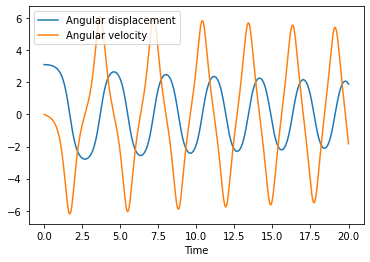

In [2]:
# The ODE
m = 1
b = 0.02
l = 1
g = 9.81
def pendulum_motion(t,y):
    return [-b*y[0]/m-g*np.sin(y[1])/l, y[0]]

# Initial conditions
theta_0 = 3.1
thetadot_0 = 0
y_0 = [thetadot_0, theta_0]

t_span = [0,20]
N_t=10000
t = np.linspace(t_span[0], t_span[1], N_t)

# Solution
sol1 = solve_ivp(pendulum_motion, t_span, y_0, t_eval=t)
theta = sol1.y[1]
theta_dot = sol1.y[0]

# Plot
plt.plot(t,theta,label="Angular displacement")
plt.plot(t,theta_dot,label="Angular velocity")
plt.legend()
plt.xlabel("Time")
plt.show()

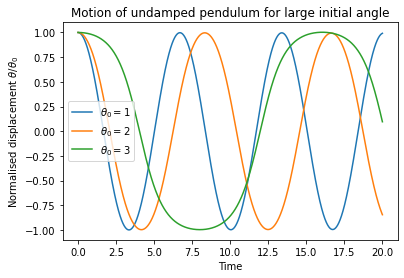

In [3]:
# The ODE
m = 1
b = 0
l = 10
g = 10
def pendulum_motion(t,y):
    return [-b*y[0]/m-g*np.sin(y[1])/l, y[0]]

# Initial conditions
theta_0 = [1,2,3]
thetadot_0 = 0

t_span = [0,20]
N_t = 10000
t = np.linspace(t_span[0], t_span[1], N_t)

for i in theta_0:
    y_0 = [thetadot_0, i]

    sol1 = solve_ivp(pendulum_motion, t_span, y_0, t_eval=t)
    theta = sol1.y[1]

    plt.plot(t,theta/i,label=r'$\theta_0=$'+str(i))
plt.legend()
plt.xlabel("Time")
plt.ylabel(r'Normalised displacement $\theta/\theta_0$')
plt.title('Motion of undamped pendulum for large initial angle')
plt.savefig('Large displacements.pdf', dpi=400)
plt.show()

## Impedance matching
Details: Q15 of waves question sheet


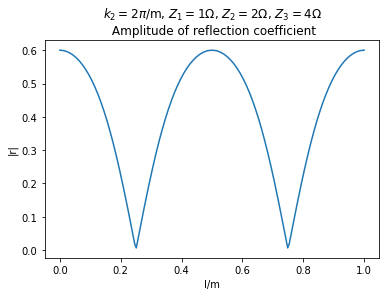

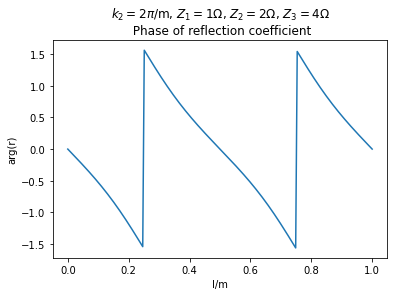

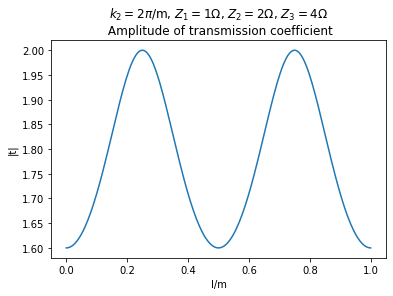

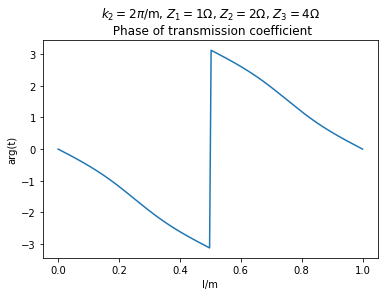

In [27]:
# Part A: This is terrible code
r_list = []
t_list = []

l_list = np.linspace(0,1,200)
res = [1,1,0,0]

for i in l_list:
    Z = np.array([[-1,1,1,0],[1,0.5,-0.5,0],[0,np.exp(-2j*pi*i),np.exp(2j*pi*i),-1], 
                  [0,np.exp(-2j*pi*i),-np.exp(2j*pi*i),-0.5]])
    sol = np.linalg.solve(Z, res)
    r_list.append(sol[0])
    t_list.append(sol[3])
    
plt.plot(l_list, np.absolute(r_list))
plt.xlabel('l/m')
plt.ylabel('|r|')
plt.title(r'$k_2=2\pi$/m, $Z_1=1\Omega$, $Z_2=2\Omega$, $Z_3=4\Omega$'+'\n Amplitude of reflection coefficient')
plt.savefig('part_a_r_amplitude.pdf')
plt.show()

plt.plot(l_list, np.angle(r_list))
plt.xlabel('l/m')
plt.ylabel('arg(r)')
plt.title(r'$k_2=2\pi$/m, $Z_1=1\Omega$, $Z_2=2\Omega$, $Z_3=4\Omega$'+'\n Phase of reflection coefficient')
plt.savefig('part_a_r_arg.pdf')
plt.show()

plt.plot(l_list, np.absolute(t_list))
plt.xlabel('l/m')
plt.ylabel('|t|')
plt.title(r'$k_2=2\pi$/m, $Z_1=1\Omega$, $Z_2=2\Omega$, $Z_3=4\Omega$'+'\n Amplitude of transmission coefficient')
plt.savefig('part_a_t_amplitude.pdf')
plt.show()

plt.plot(l_list, np.angle(t_list))
plt.xlabel('l/m')
plt.ylabel('arg(t)')
plt.title(r'$k_2=2\pi$/m, $Z_1=1\Omega$, $Z_2=2\Omega$, $Z_3=4\Omega$'+'\n Phase of transmission coefficient')
plt.savefig('part_a_t_arg.pdf')
plt.show()

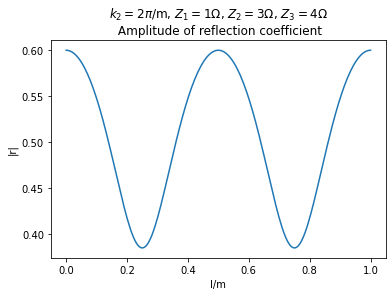

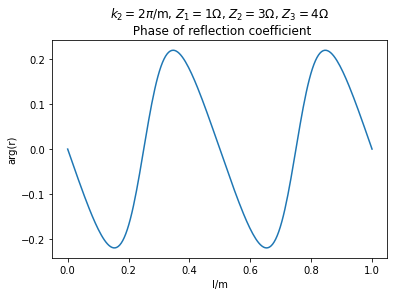

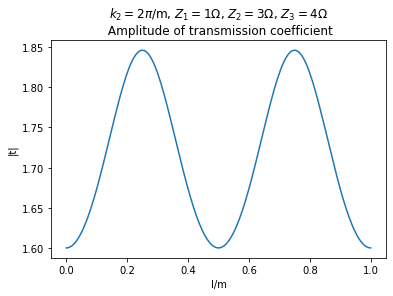

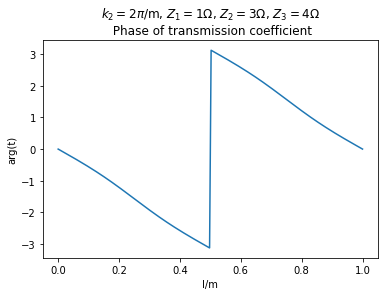

In [28]:
# Part A: This is terrible code
r_list = []
t_list = []

l_list = np.linspace(0,1,200)
res = [1,1,0,0]

for i in l_list:
    Z = np.array([[-1,1,1,0],[1,1/3,-1/3,0],[0,np.exp(-2j*pi*i),np.exp(2j*pi*i),-1], 
                  [0,np.exp(-2j*pi*i),-np.exp(2j*pi*i),-0.75]])
    sol = np.linalg.solve(Z, res)
    r_list.append(sol[0])
    t_list.append(sol[3])
    
plt.plot(l_list, np.absolute(r_list))
plt.xlabel('l/m')
plt.ylabel('|r|')
plt.title(r'$k_2=2\pi$/m, $Z_1=1\Omega$, $Z_2=3\Omega$, $Z_3=4\Omega$'+'\n Amplitude of reflection coefficient')
plt.savefig('part_b_r_amplitude.pdf')
plt.show()

plt.plot(l_list, np.angle(r_list))
plt.xlabel('l/m')
plt.ylabel('arg(r)')
plt.title(r'$k_2=2\pi$/m, $Z_1=1\Omega$, $Z_2=3\Omega$, $Z_3=4\Omega$'+'\n Phase of reflection coefficient')
plt.savefig('part_b_r_arg.pdf')
plt.show()

plt.plot(l_list, np.absolute(t_list))
plt.xlabel('l/m')
plt.ylabel('|t|')
plt.title(r'$k_2=2\pi$/m, $Z_1=1\Omega$, $Z_2=3\Omega$, $Z_3=4\Omega$'+'\n Amplitude of transmission coefficient')
plt.savefig('part_b_t_amplitude.pdf')
plt.show()

plt.plot(l_list, np.angle(t_list))
plt.xlabel('l/m')
plt.ylabel('arg(t)')
plt.title(r'$k_2=2\pi$/m, $Z_1=1\Omega$, $Z_2=3\Omega$, $Z_3=4\Omega$'+'\n Phase of transmission coefficient')
plt.savefig('part_b_t_arg.pdf')
plt.show()